### 3.Visualisation des données 
Ce notebook présente des différentes statistiques test faites sur le dataset. 
Pour le faire il a besoin des librairies _matplotlib, spacy, datasets et wordcloud_
Dans un premier temps, il trouve les adjectifs les plus communs dans les recettes, dans le but d'utiliser l'analyse morphosyntaique de SpaCy et la loi de Zipf est testée. 
Dans un deuxième temps les statistiques utilisés par le DataSet exemple (issu de HuggingFace) sont abordées. Ce sont _Les ingrédients les plus communs par pays_ et _Les termes les plus présents dans les noms des recettes_

__NOTE :__
Pour ce qui est des statitisques faites pour trouver les ingrédients les plus communs par pays, les résultats ne sont pas les meilleurs qu'on aurait pu obtenir. Pour y arriver, il faut faire un pré-traitement méticuleux du corpus qui arrive à reconnaître seulement les noms des ingrédients dans des expressions telles que __['Dos cucharadas grandes de salsa de tomate']__ _(deux cuillères à soupe de sauce tomate)_ pour montrer exactement la fréquence de chaque ingrédient. Aussi, il existe la possibilité de faire la vectorisation des ingrédients, en utilisant un stopwords, ce qui pourrait montrer des résultats plus exacts. Je voulais vous montrer une comparaison de résultats avant _pré-traitement, après pre-traitement_ et _avant vectorisation, après vectorisation_. Malheureusement, j'ai pas réussi à le faire tenant compte des limites du temps. C'est pour cela que j'ajoute la version orginale, sans pré-traitement et sans vectorisation.

In [ ]:
!pip install matplotlib

In [ ]:
pip install spacy

In [ ]:
pip install datasets

In [ ]:
pip install wordcloud

In [13]:
import matplotlib.pyplot as plt
import spacy
import pandas as pd
from collections import Counter
from datasets import load_dataset
import seaborn as sns


In [23]:
'''
Crée le dataset à partir du csv et charge le dictionnaire en espagnol pour spacy
'''
dataset=load_dataset("csv", data_files="recettes_1.csv", split="train")
dataset = dataset.to_pandas()
nlp = spacy.load("es_core_news_sm")

Generating train split: 90 examples [00:00, 2087.68 examples/s]


#### Adecjtifs les plus communs dans les pas des recettes

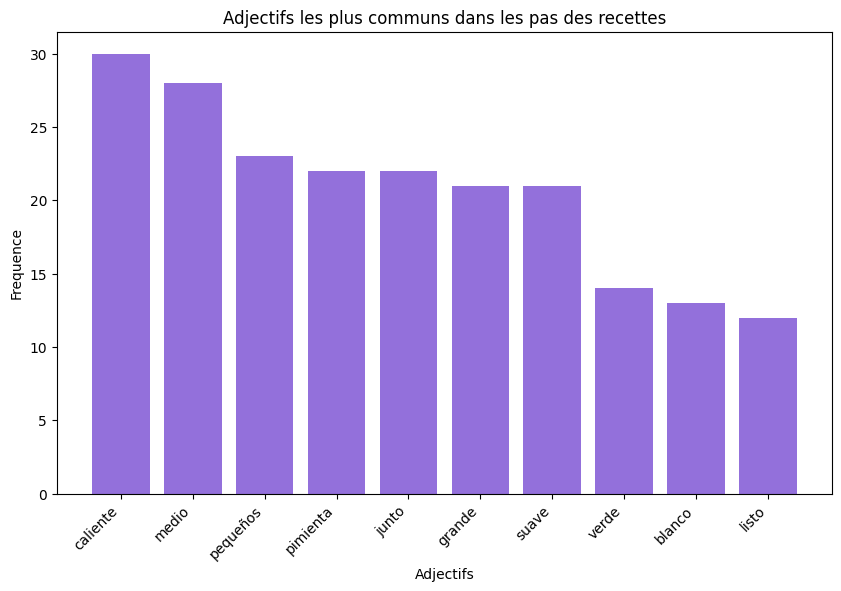

In [42]:
n_adjectifs= Counter([token.text for doc in nlp.pipe(dataset['pas']) for token in doc if token.pos_ == "ADJ"])


n_adjectifs_communs = 10  
adj, freq = zip(*n_adjectifs.most_common(n_adjectifs_communs))


plt.figure(figsize=(10, 6))
plt.bar(adj, freq, color='mediumpurple')
plt.xlabel('Adjectifs')
plt.ylabel('Frequence')
plt.title('Adjectifs les plus communs dans les pas des recettes')
plt.xticks(rotation=45, ha='right')
plt.show()

#### Loi de Zipf :

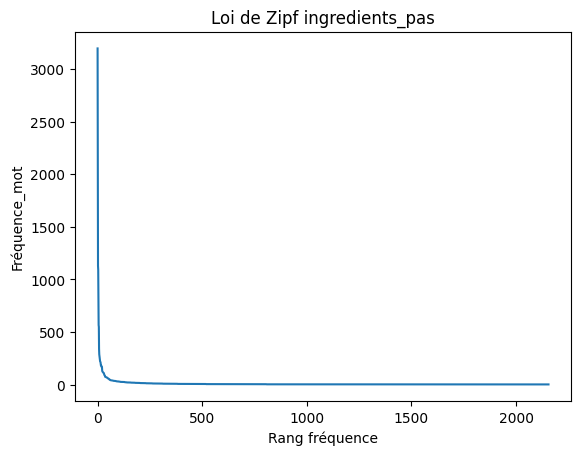

In [43]:

all_words = []


for index, row in dataset.iterrows():
    text = ", ".join([str(row["ingredients"]), str(row["pas"])])
    doc = nlp(text)
    all_words.extend([str(token) for token in doc])


word_counter = Counter(all_words)
sorted_word_counts = sorted(word_counter.values(), reverse=True)


plt.plot(sorted_word_counts)
plt.xlabel("Rang fréquence")
plt.ylabel("Fréquence_mot")
plt.title("Loi de Zipf ingredients_pas")
plt.show()


#### STATISTIQUES FAITES DANS MON DATASET D'EXEMPLE


#### Ingrédients les plus communs par pays

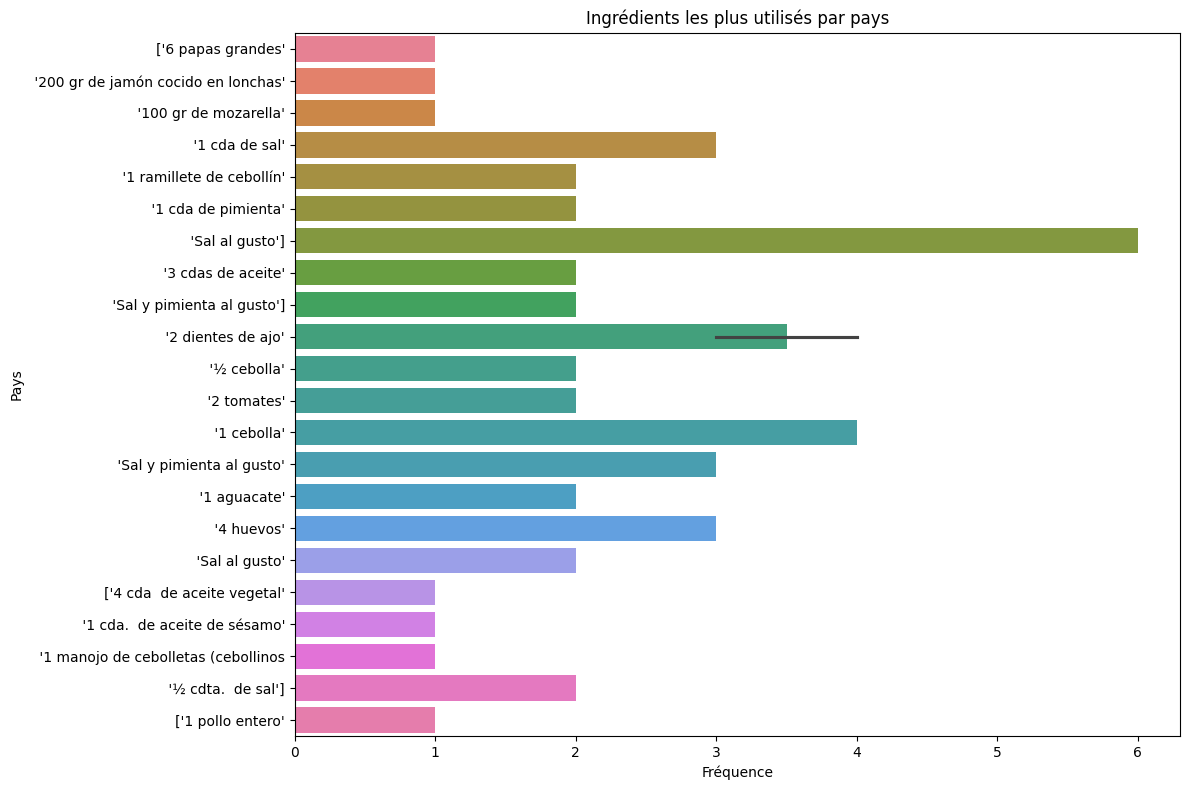

In [33]:
'''
Fait une visualisation en barres verticales
'''
ingredients_pays = {}
for pays, groupe in dataset.groupby("nationalité_recette"):
    ingredients = []
    for liste_ingredients in groupe['ingredients']:
        ingredients.extend(liste_ingredients.split(","))
    ingredients_pays[pays] = Counter(ingredients)
    
n_i_communs = 3
ingredients_communs_pays = {}
for pays, compteur in ingredients_pays.items():
    ingredients_communs_pays[pays] = dict(compteur.most_common(n_i_communs))

ingredients_df = pd.DataFrame.from_dict(ingredients_communs_pays, orient='index')

plt.figure(figsize=(12, 8))
sns.barplot(data=ingredients_df, orient="h")
plt.xlabel("Fréquence")
plt.ylabel("Pays")
plt.title("Ingrédients les plus utilisés par pays")
plt.tight_layout()
plt.show()


Étant donnée que mon dataset d'exemple utilisait un Wordcloud pour montrer les résultats, j'ai fait le même:

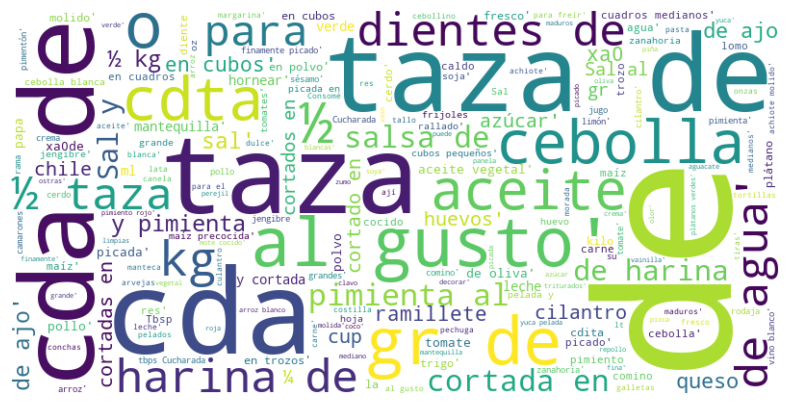

In [27]:
'''
Fait une visualisation dans un nuage de mots
'''
from wordcloud import WordCloud
ingredients_pays = {}
for pays, groupe in dataset.groupby("nationalité_recette"):
    ingredients = []
    for liste_ingredients in groupe['ingredients']:
        ingredients.extend(liste_ingredients.split(","))
    ingredients_pays[pays] = Counter(ingredients)
    
n_i_communs = 3
ingredients_communs_pays = {}
for pays, compteur in ingredients_pays.items():
    ingredients_communs_pays[pays] = dict(compteur.most_common(n_i_communs))

ingredients_df = pd.DataFrame.from_dict(ingredients_communs_pays, orient='index')

texte = ' '.join([','.join(ingredients) for ingredients in ingredients_pays.values()])


wordcloud = WordCloud(width=800, height=400, background_color='white').generate(texte)


plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

#### Termes les plus présents dans les noms des récettes

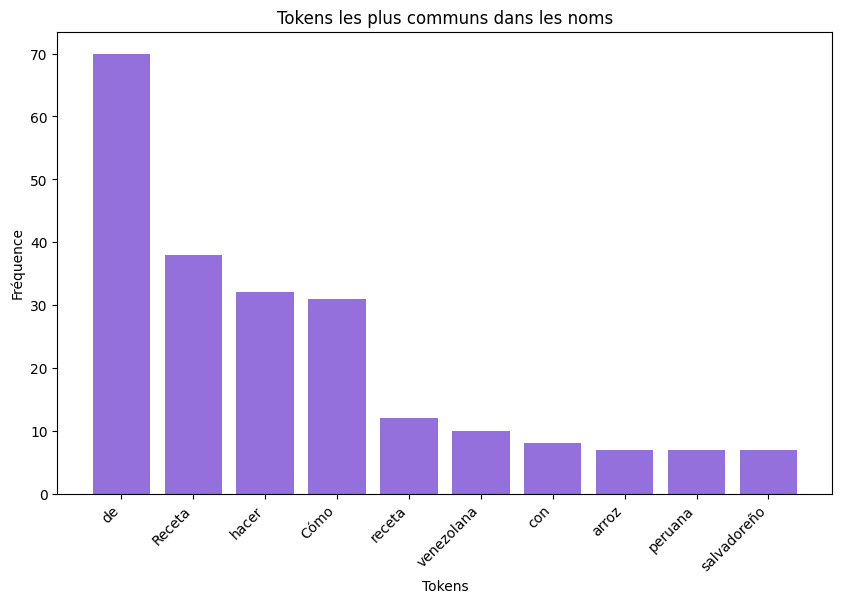

In [39]:
tous_tokens = []
for liste_ingredientes in dataset['nom']:
    for ingredient in liste_ingredientes.split(","):
        tous_tokens.extend(ingredient.strip().split(" "))


compteur_tokens = Counter(tous_tokens)
n_tokens_comunes = 10  
tokens_comunes = compteur_tokens.most_common(n_tokens_comunes)
tokens, frecuencias = zip(*tokens_comunes)


plt.figure(figsize=(10, 6))
plt.bar(tokens, frecuencias, color='mediumpurple')
plt.xlabel('Tokens')
plt.ylabel('Fréquence')
plt.title('Tokens les plus communs dans les noms')
plt.xticks(rotation=45, ha='right')
plt.show()
